<a href="https://colab.research.google.com/github/davidnol/ET5003_SEM1_2021-2/blob/main/ET5003_KaggleCompetition_DavidNolan_20146744.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

SyntaxError: ignored

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [4]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [6]:
!pip install gpy

In [7]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az
import seaborn as sns
from scipy import stats
from imblearn.combine import SMOTETomek 

In [8]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [9]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Path, copy the path from your Drive
    Path = '/content/drive/MyDrive/Colab Notebooks/DavidNolan/'
    
else:
    Path = "./Data/"

# House price data from csv files
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

df_train = pd.read_csv(train_data)
print("Training data {}".format(df_train.shape))

# Test data
df_test = pd.read_csv(test_data)
print("Test data {}".format(df_test.shape))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training data (1638, 14)
Test data (702, 13)


In [ ]:
df_train.head()

In [ ]:
df_train.tail()

In [ ]:
df_train.describe()

In [10]:
# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Read of missing values as percentage of data set")
df_train.isna().sum()*100/len(df_train)

Read of missing values as percentage of data set


Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

In [ ]:
# Look for missing values
df_train.isna().sum()

In [11]:
df_train = df_train.drop(['Services'], axis=1)
df_test = df_test.drop(['Services'], axis=1)

In [ ]:
df_train.head()

In [12]:
df_train['BER_class'].unique()

array(['C3', 'D1', 'A3', 'E1', nan, 'G', 'E2', 'C2',
       'SINo666of2006exempt', 'F', 'B2', 'C1', 'D2', 'B3', 'B1', 'A2',
       'A1'], dtype=object)

In [13]:
df_test['BER_class'].unique()

array(['C2', 'E1', 'G', 'A2', 'F', 'C3', nan, 'D1', 'B2', 'D2', 'E2',
       'C1', 'B3', 'A3', 'B1', 'SINo666of2006exempt'], dtype=object)

In [13]:
df_test.isna().sum()

Index              0
ID                 0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        108
Description        0
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
dtype: int64

In [14]:
#Fill in for missing BER_class values
df_train = df_train.fillna('none')
df_test = df_test.fillna('none')

In [15]:
df_train.isna().sum()

Index            0
ID               0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
Price            0
dtype: int64

In [16]:
df_test.isna().sum()

Index            0
ID               0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
dtype: int64

In [17]:
df_train['Num_Beds'].value_counts()

3     558
2     464
4     348
1     114
5     107
6      29
7      11
15      2
9       2
8       2
27      1
Name: Num_Beds, dtype: int64

In [18]:
df_train['Num_Bathrooms'].value_counts()

1     603
2     584
3     327
4      76
5      24
6      11
7       6
8       3
15      2
18      1
9       1
Name: Num_Bathrooms, dtype: int64

In [19]:
df_train['BER_class'].value_counts()

none                   251
D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [20]:
df_train['Type'].value_counts()

semi-detached     458
apartment         431
terraced          299
detached          234
end-of-terrace    118
bungalow           48
duplex             33
townhouse          14
studio              2
site                1
Name: Type, dtype: int64

In [15]:
# Drop the Text Based Features, Low Value Features that I dont plan to use for NLP
drop_features = ['ID']

df_train_new = df_train.drop(drop_features, axis=1)
df_test_new = df_test.drop(drop_features, axis=1)

In [22]:
df_train_new.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
0,1,Ongar,2,2,C3,DNG are delighted to present to the market no....,None,53.396659,-6.438791,apartment,67.00,195000
1,2,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [16]:
# Replace all ber values with equivalant decimal values. Ignore Nan.
df_train_new.dropna(subset=['BER_class'], inplace=True)
ber_features = df_train_new['BER_class'].sort_values().unique()

new_ber_values = np.arange(1, len(ber_features) + 1).tolist()

df_train_new['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

df_test_new.dropna(subset=['BER_class'], inplace=True)
df_test_new['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

In [ ]:
df_train_new.head()

In [ ]:
df_train_new.tail()

In [17]:
# Replace property type
replace_ptype_features = ['apartment', 'studio', 'duplex', 'townhouse', 'terraced', 'end-of-terrace',
                          'semi-detached', 'detached', 'bungalow', 'site' ]

replace_values = np.arange(1, len(replace_ptype_features) + 1).tolist()

# Apply basic conversion to the property type
df_train_new['Type'].replace(to_replace=replace_ptype_features,
                                      value=replace_values,
                                      inplace=True)

df_test_new['Type'].replace(to_replace=replace_ptype_features,
                                      value=replace_values,
                                      inplace=True)
# Remove columns with 0 - causes problems for the scalers used below
df_train_new = df_train_new[(df_train_new.Num_Beds>0)]

# Also drops all sites - this is intended
df_train_new = df_train_new[(df_train_new.Num_Bathrooms>0)]

df_train_new = df_train_new[(df_train_new.Price>0)]

In [25]:
df_train_new.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
0,1,Ongar,2,2,9,DNG are delighted to present to the market no....,None,53.396659,-6.438791,1,67.00,195000
1,2,North Strand,1,2,10,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,5,95.97,425000
2,3,Stepaside,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,7,107.00,535000
3,4,Cabinteely,1,3,12,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,8,81.00,499000
4,5,Lusk,3,4,10,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,8,153.00,510000


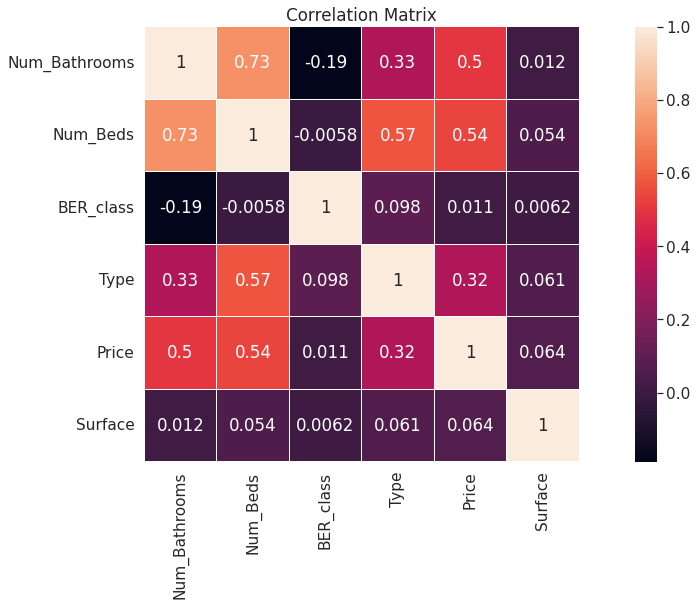

In [18]:

# Check relationships between numerical variables
import seaborn as sns
df_train_new[['Num_Bathrooms','Num_Beds','BER_class','Type','Price','Surface']].dropna()

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 8))
plt.title('Correlation Matrix')
sns.heatmap(df_train_new[['Num_Bathrooms','Num_Beds','BER_class','Type','Price','Surface']].corr(),linewidths=0.01,
            square=True,annot=True)

Correlation of 0.73 between number of beds and number of bathrooms. 0.54 for number of beds and price and 0.32 Type and Price.

In [19]:
# First filter out those rows which
# do not contain any data
df_train_new = df_train_new.dropna(how = 'any')
df_train_new.drop(df_train_new[df_train_new['Num_Beds'] == 0].index, inplace = True)
df_train_new.drop(df_train_new[df_train_new['Num_Bathrooms'] == 0].index, inplace = True)
print(df_train_new.select_dtypes(exclude=['object']).isna().sum())

Index            0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Latitude         0
Longitude        0
Type             0
Surface          0
Price            0
dtype: int64


In [20]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(dframe, feature):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
        ax1.set_title("Boxplot of "+features[i])
        dframe.boxplot(column=[features[i]])

        ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
        ax2.set_title("Histogram of "+features[i])
        dframe[features[i]].hist(bins=20)

    plt.show()

Analysis of outliers


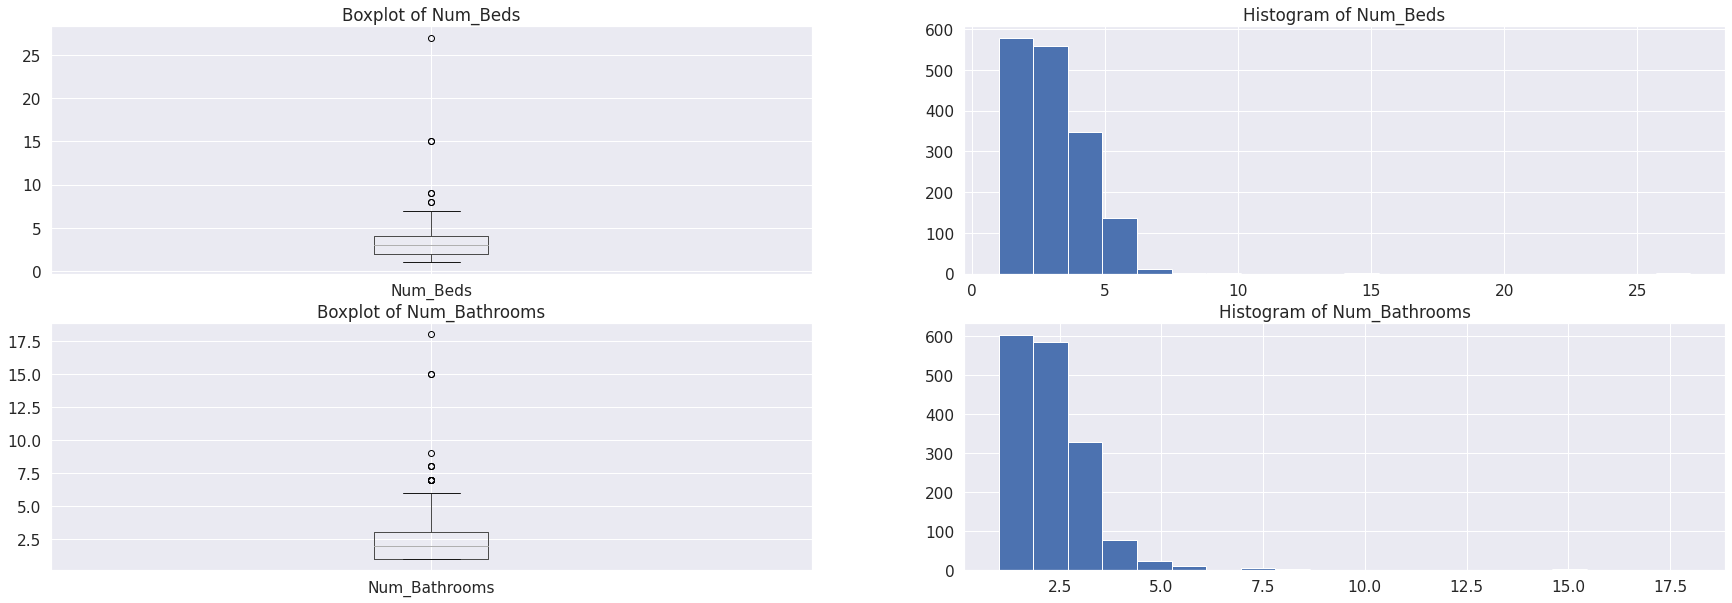

(1638, 12)
After outliers have been removed


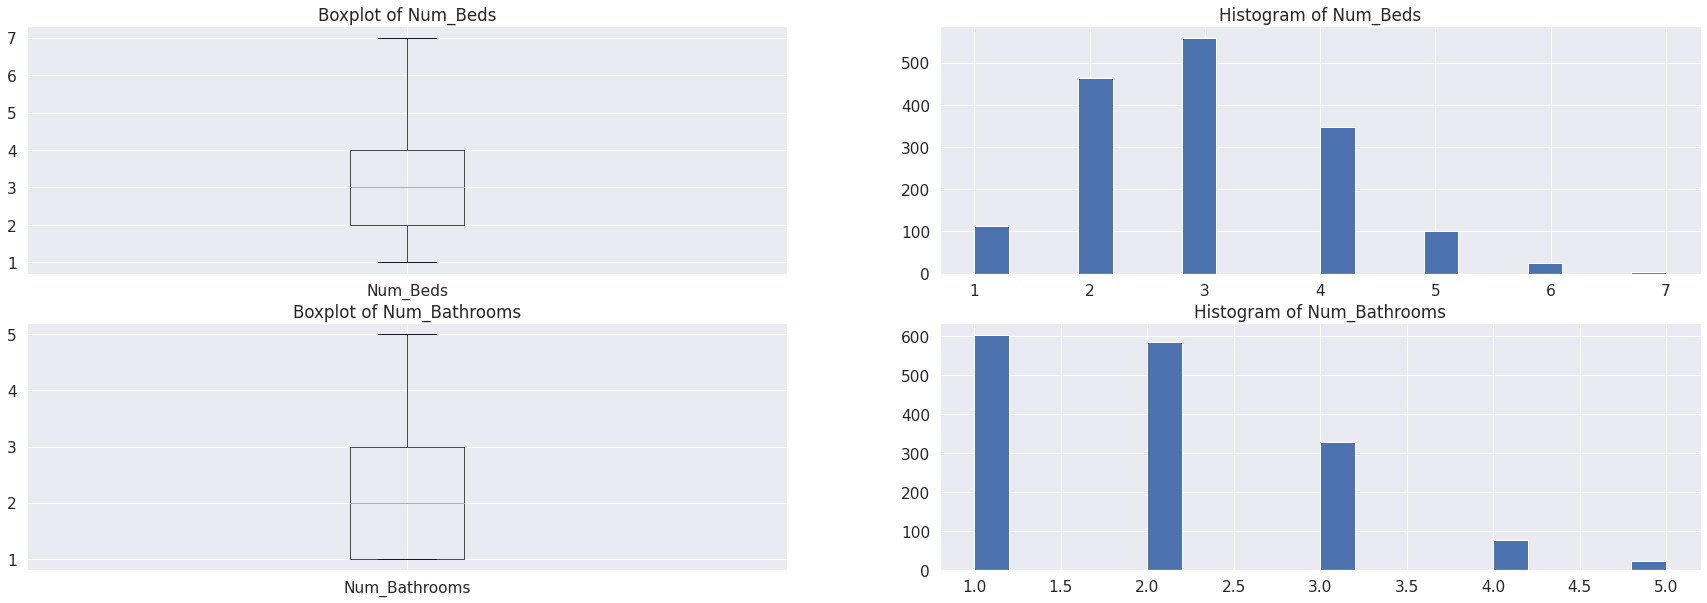

(1613, 12)


In [21]:
#Select features to include in plots
include_featues = ['Num_Beds','Num_Bathrooms']

#run print function
print("Analysis of outliers")
plot_box_hist(df_train_new, include_featues)
print(df_train_new.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train_new = remove_outliers(df_train_new,include_featues[i])

#run print function
plot_box_hist(df_train_new, include_featues)
print(df_train_new.shape)

Analysis of outliers


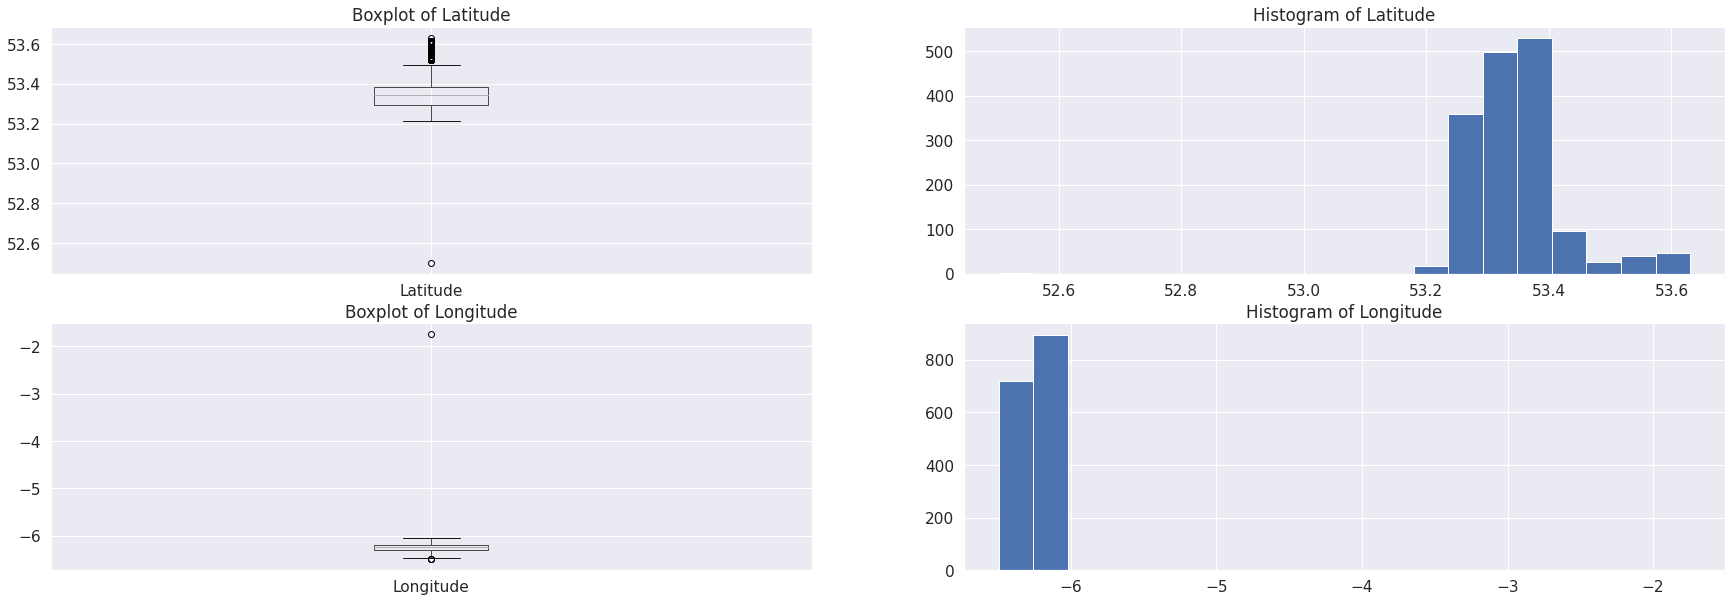

(1613, 12)
After outliers have been removed


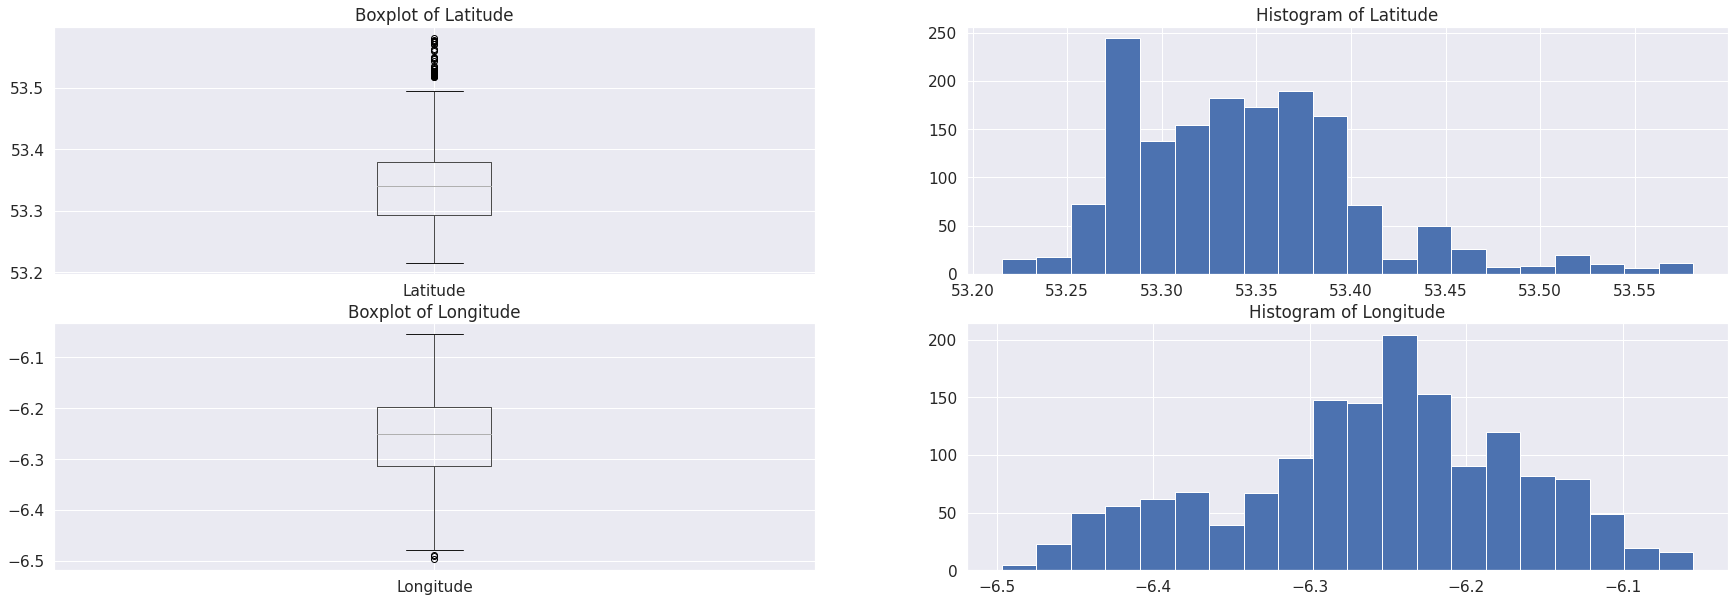

(1572, 12)


In [22]:
#Select features to include in plots
include_featues = ['Latitude','Longitude']

#run print function
print("Analysis of outliers")
plot_box_hist(df_train_new, include_featues)
print(df_train_new.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train_new = remove_outliers(df_train_new,include_featues[i])

#run print function
plot_box_hist(df_train_new, include_featues)
print(df_train_new.shape)


In [23]:
# Drop  location inconsistent with county Dublin
InconsistentLongitude = df_train_new[df_train_new['Longitude'] > -6].index
df_train_new.drop(InconsistentLongitude, inplace=True)

Analysis of outliers


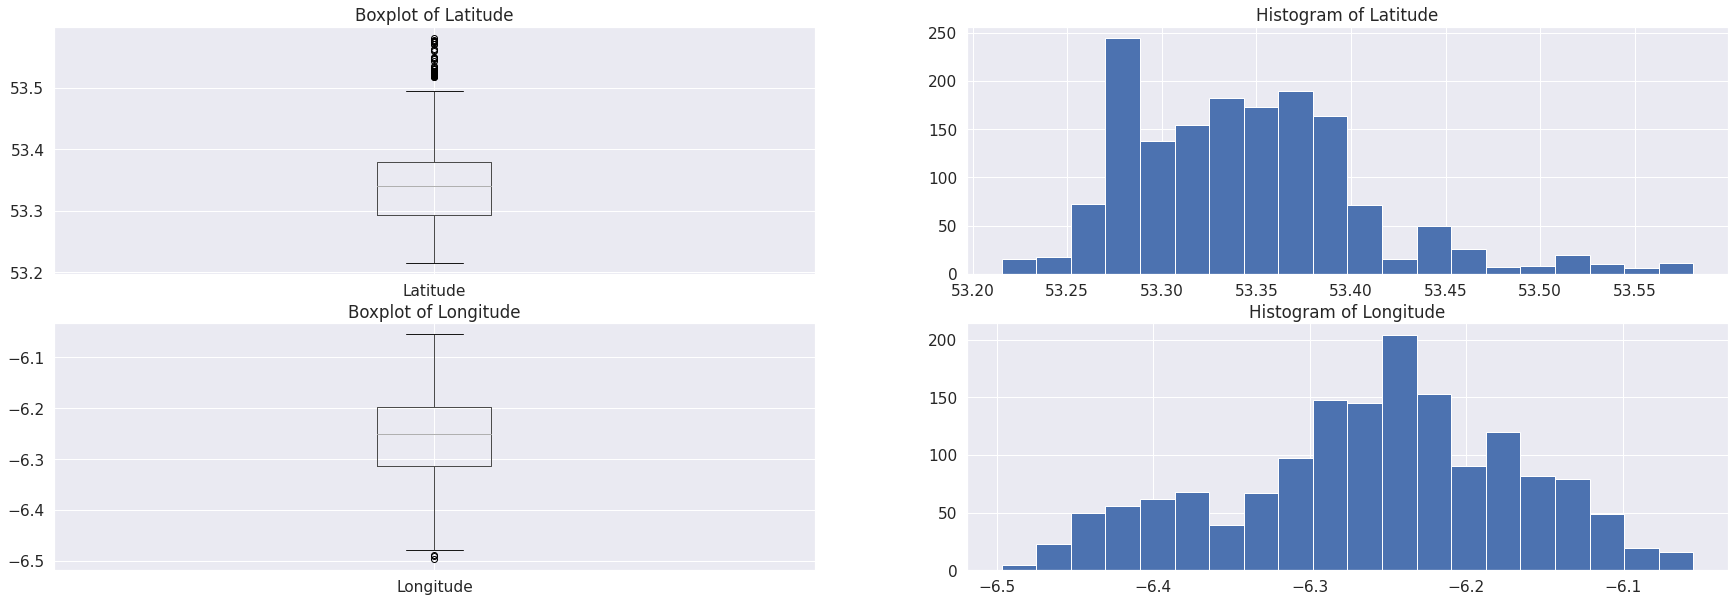

(1572, 12)
After outliers have been removed


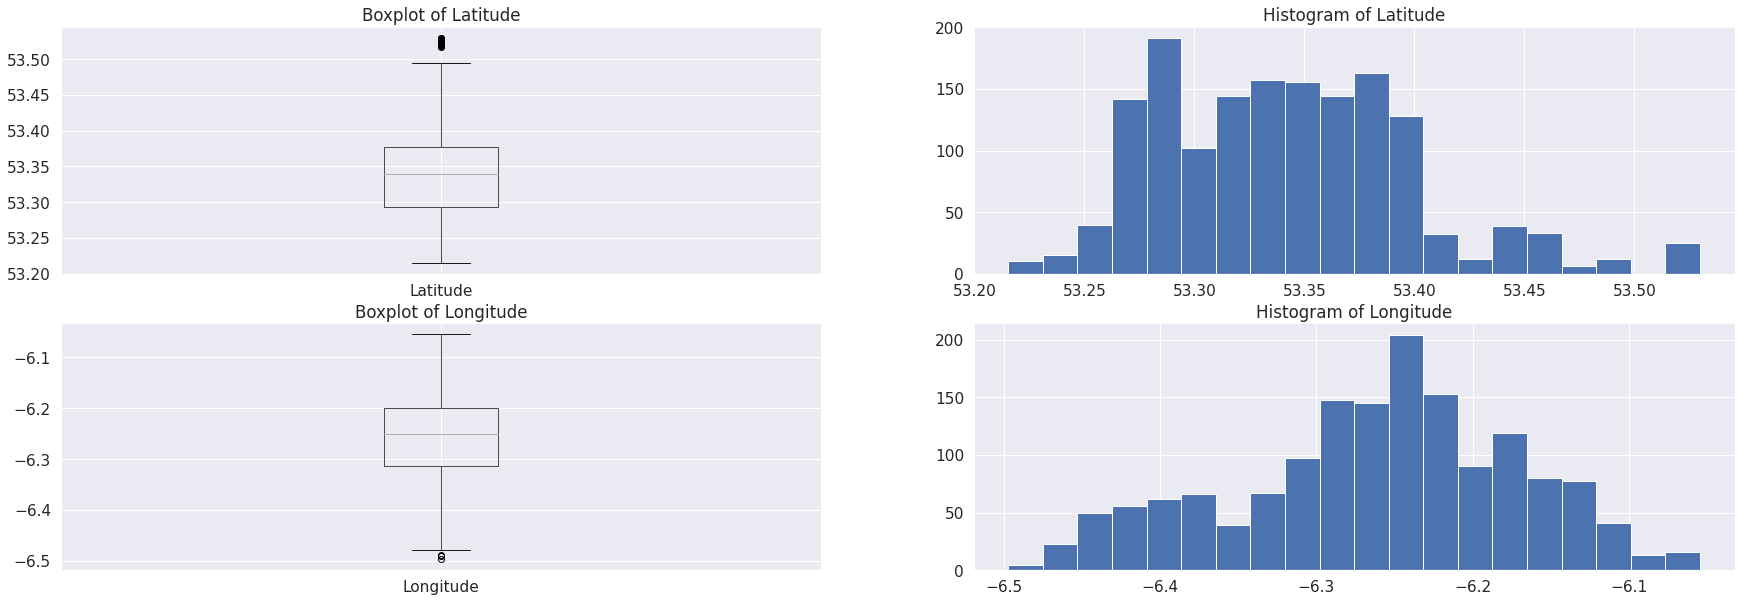

(1551, 12)


In [24]:
#Select features to include in plots
include_featues = ['Latitude','Longitude']

#run print function
print("Analysis of outliers")
plot_box_hist(df_train_new, include_featues)
print(df_train_new.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train_new = remove_outliers(df_train_new,include_featues[i])

#run print function
plot_box_hist(df_train_new, include_featues)
print(df_train_new.shape)

In [45]:
# show first data frame rows 
df_train_new.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
0,1,ongar,2,2,9,dng delighted present market no. chipping row....,none,53.396659,-6.438791,1,67.00,195000
1,2,north strand,1,2,10,13 northbrook terrace charming red brick perio...,bight spacious interior numerous original feat...,53.357129,-6.239779,5,95.97,425000
2,3,stepaside,3,3,3,"welcome no. cotter close, immaculately present...",special features large rear garden generous st...,53.266468,-6.222771,7,107.00,535000
3,4,cabinteely,1,3,12,welcome sycamore walk! enjoying premier addres...,wonderful bed detached bungalow. accommodation...,53.261600,-6.166738,8,81.00,499000
5,6,glasnevin,1,3,12,property team lappin estates take great pleasu...,none,53.380367,-6.279310,5,140.00,360000


In [ ]:
# show first data frame rows 
df_test_new.head()

In [25]:
print('Orginal train shape') 
print(df_train.shape)
print('New train shape')
print(df_train_new.shape)
print('Orginal test shape') 
print(df_test.shape)
print('New test shape') 
print(df_test_new.shape)

Orginal train shape
(1638, 13)
New train shape
(1551, 12)
Orginal test shape
(702, 12)
New test shape
(702, 11)


# Preprocessing the textual features

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Using SnowballStemmer to remove stopwords and stemming
stemmer = SnowballStemmer('english', ignore_stopwords=False)

In [28]:
# Downloading a stopwords reference to filter out these words from the dataset
stop = set(stopwords.words('english'))

In [29]:
text_features = ['Location', 'Description', 'Features']
index_list = df_train_new['Index']
index_list_test = df_test_new['Index']

In [30]:
# Preprocessing training and test features
for i in text_features:
    
    # Removing single letters
    df_train_new[i] = df_train_new[i].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
    df_test_new[i] = df_test_new[i].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
    
    # Make all text lower case
    df_train_new[i] = df_train_new[i].apply(lambda x: x.lower())
    df_test_new[i] = df_test_new[i].apply(lambda x: x.lower())
    
    # Detokenisation
    tokens = df_train_new[i].apply(lambda x: x.split())
    tokens_test = df_test_new[i].apply(lambda x: x.split())
    
    # remove stop-words
    tokens = tokens.apply(lambda x: [item for item in x if item not in stop])
    tokens_test = tokens_test.apply(lambda x: [item for item in x if item not in stop])
    
    # Remove tokens
    no_tokens = []
    no_tokens_test = []
    
    for j in index_list-1:
        t = ' '.join(tokens[j])
        no_tokens.append(t)
        
    for k in index_list_test-1639:
        t = ' '.join(tokens_test[k])
        no_tokens_test.append(t)
    
    # Replace feature with the de-tokenised text
    df_train_new[i] = no_tokens
    df_test_new[i] = no_tokens_test

## Training & Test Data

In [31]:
# Seperating the predictor variable from the data set
X = df_train_new.loc[:, df_train_new.columns != 'Price']
y = df_train_new['Price']

In [32]:
# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.3)

In [33]:
# Converting to np arrays
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
X_test = df_test_new.to_numpy()

In [34]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [46]:
# TfidVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 500, max_df=0.5, smooth_idf=True)

In [47]:
# NLP is only applicable to the features Location, Description and Features

# Features to store just the textual information
X_train_nlp = []
X_val_nlp = []
X_test_nlp = []

for i in range(len(X_train)):
    X_train_nlp.append([X_train[i][2], X_train[i][5], X_train[i][6], X_train[i][7], X_train[i][10]])
    
for i in range(len(X_val)):
    X_val_nlp.append([X_val[i][2], X_val[i][5], X_val[i][6], X_val[i][7], X_val[i][10]])
    
for i in range(len(X_test)):
    X_test_nlp.append([X_test[i][2], X_test[i][5], X_test[i][6], X_test[i][7], X_test[i][10]])

KeyError: ignored

In [40]:
# Joining all words for all features for each entry into one string
for i in range(len(X_train_nlp)):
    temp = ' '.join(X_train_nlp[i])
    X_train_nlp[i] = temp

for i in range(len(X_val_nlp)):
    temp = ' '.join(X_val_nlp[i])
    X_val_nlp[i] = temp
    
for i in range(len(X_test_nlp)):
    temp = ' '.join(X_test_nlp[i])
    X_test_nlp[i] = temp

In [41]:
# Running TfidVectorizer on the input data
X_train_nlp = vectorizer.fit_transform(X_train_nlp)
X_val_nlp = vectorizer.fit_transform(X_val_nlp)
X_test_nlp = vectorizer.fit_transform(X_test_nlp)

ValueError: ignored

In [42]:
# create a model
MNB = MultinomialNB()

# fit to data
MNB.fit(X_train_nlp, y_train)

ValueError: ignored

In [43]:
y_pred_train = MNB.predict(X_train_nlp)
#print('Training prediction\t', y_pred_train)

y_pred_val = MNB.predict(X_val_nlp)
#print('Validation prediction\t\t', y_pred_val)

y_pred_test = MNB.predict(X_test_nlp)
#print('Test prediction\t\t', y_pred_test)

NotFittedError: ignored

In [44]:
# Determine accuracy on the training set
print("Training Accuracy: "+str(accuracy_score(y_train, y_pred_train)))

# Determine accuracy on the validation set
print("Validation Accuracy: "+str(accuracy_score(y_val, y_pred_val)))

NameError: ignored

In [ ]:
index = df_test['Index'].to_numpy()
nlp_prediction = pd.DataFrame({'Index': index, 'Price': y_pred_test}, columns=['Index', 'Price'])
nlp_prediction.to_csv("ET5003_Kaggle_David_Nolan_20146744.csv",index=False)

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [44]:
# Drop the Text Based Features, Low Value Features that I dont plan to use for NLP
drop_features = ['Index','Location', 'Description', 'Features']

df_train_new = df_train.drop(drop_features, axis=1)
df_test_new = df_test.drop(drop_features, axis=1)

In [45]:
df_train_new.head()

,ID,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price
0,12409116,2,2,C3,53.396659,-6.438791,apartment,67.00,195000
1,12320330,1,2,D1,53.357129,-6.239779,terraced,95.97,425000
2,12405953,3,3,A3,53.266468,-6.222771,semi-detached,107.00,535000
3,12202582,1,3,E1,53.261600,-6.166738,detached,81.00,499000
4,12299336,3,4,D1,53.550731,-6.121415,detached,153.00,510000


In [46]:
# Replace all ber values with equivalant decimal values. Ignore Nan.
df_train_new.dropna(subset=['BER_class'], inplace=True)
ber_features = df_train_new['BER_class'].sort_values().unique()

new_ber_values = np.arange(1, len(ber_features) + 1).tolist()

df_train_new['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

df_test_new.dropna(subset=['BER_class'], inplace=True)
df_test_new['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

In [ ]:
df_train_new.head()

In [47]:
df_train_new = df_train_new.drop(['ID'], axis=1)
df_test_new = df_test_new.drop(['ID'], axis=1)

In [48]:
# Replace property type
replace_ptype_features = ['apartment', 'studio', 'duplex', 'townhouse', 'terraced', 'end-of-terrace',
                          'semi-detached', 'detached', 'bungalow', 'site' ]

replace_values = np.arange(1, len(replace_ptype_features) + 1).tolist()

# Apply basic conversion to the property type
df_train_new['Type'].replace(to_replace=replace_ptype_features,
                                      value=replace_values,
                                      inplace=True)

df_test_new['Type'].replace(to_replace=replace_ptype_features,
                                      value=replace_values,
                                      inplace=True)
# Remove columns with 0 - causes problems for the scalers used below
df_train_new = df_train_new[(df_train_new.Num_Beds>0)]

# Also drops all sites - this is intended
df_train_new = df_train_new[(df_train_new.Num_Bathrooms>0)]

df_train_new = df_train_new[(df_train_new.Price>0)]

In [49]:
df_train_new.head()

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price
0,2,2,9,53.396659,-6.438791,1,67.00,195000
1,1,2,10,53.357129,-6.239779,5,95.97,425000
2,3,3,3,53.266468,-6.222771,7,107.00,535000
3,1,3,12,53.261600,-6.166738,8,81.00,499000
4,3,4,10,53.550731,-6.121415,8,153.00,510000


In [48]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X = df_train_new.drop("Price",axis=1)
y = df_train_new["Price"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [49]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful

featrain = ['Num_Beds','Num_Bathrooms', 'Latitude','Longitude']

# dropna: remove missing values
df_subset_train = df_train_new[featrain].dropna(axis=0)

# Test data
featest = ['Num_Beds','Num_Bathrooms', 'Latitude','Longitude']
df_subset_test = df_test_new[featest].dropna(axis=0)

In [50]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [52]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

# Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xs_train)
Xn_train = xscaler.transform(Xs_train)

#Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xs_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

ValueError: ignored

In [ ]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

In [ ]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [ ]:
# samples from the posterior
posterior = approximation.sample(5000)

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
ind=[2,3]

X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [ ]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

In [ ]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

In [ ]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [ ]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [ ]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [ ]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [ ]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

In [ ]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

In [ ]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

In [ ]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

In [ ]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

In [ ]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [ ]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [ ]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot")

In [ ]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [ ]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [ ]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# MAE
print("MAE=",np.mean(joint))

In [ ]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.